# Adaboost Demonstration

This notebook demonstrate

-  The decision boundary of Adaboost
-  The effect of the learning rate 
-  The effect of the number of stumps 

In [1]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import seaborn as sns
import pandas as pd


def AdaBoost_scratch(X,y, M, learning_rate, depth = 1):
    #Initialization of utility variables
    N = len(y)
    estimator_list, y_predict_list, estimator_error_list, estimator_weight_list, sample_weight_list = [], [],[],[],[]

    #Initialize the sample weights
    sample_weight = np.ones(N) / N
    sample_weight_list.append(sample_weight.copy())

    #For m = 1 to M
    for m in range(M):   

        #Fit a classifier
        estimator = DecisionTreeClassifier(max_depth = depth)
        estimator.fit(X, y, sample_weight=sample_weight)
        y_predict = estimator.predict(X)

        #Misclassifications
        incorrect = (y_predict != y)

        #Estimator error
        estimator_error = np.mean( np.average(incorrect, weights=sample_weight, axis=0))
        
        #Boost estimator weights
        estimator_weight =  learning_rate * np.log((1. - estimator_error) / estimator_error)

        #Boost sample weights
        sample_weight *= np.exp(estimator_weight * incorrect * ((sample_weight > 0) | (estimator_weight < 0)))

        #Save iteration values
        estimator_list.append(estimator)
        y_predict_list.append(y_predict.copy())
        estimator_error_list.append(estimator_error.copy())
        estimator_weight_list.append(estimator_weight.copy())
        sample_weight_list.append(sample_weight.copy())
        


    #Convert to np array for convenience   
    estimator_list = np.asarray(estimator_list)
    y_predict_list = np.asarray(y_predict_list)
    estimator_error_list = np.asarray(estimator_error_list)
    estimator_weight_list = np.asarray(estimator_weight_list)
    sample_weight_list = np.asarray(sample_weight_list)

    #Predictions
    preds = (np.array([np.sign((y_predict_list[:,point] * estimator_weight_list).sum()) for point in range(N)]))
    
    print('')
    print('Accuracy = ', (preds == y).sum() / N) 
    print('')
    
    return estimator_list, estimator_weight_list, sample_weight_list

def plot_AdaBoost_scratch_boundary(estimators,estimator_weights, X, y, N = 10,ax = None ):
    
    def AdaBoost_scratch_classify(x_temp, est,est_weights ):
        '''Return classification prediction for a given point X and a previously fitted AdaBoost'''
        temp_pred = np.asarray( [ (e.predict(x_temp)).T* w for e, w in zip(est,est_weights )]  ) / est_weights.sum()
        return np.sign(temp_pred.sum(axis = 0))
    
    
    '''Utility function to plot decision boundary and scatter plot of data'''
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid( np.linspace(x_min, x_max, N), np.linspace(y_min, y_max, N))


    zz = np.array( [AdaBoost_scratch_classify(np.array([xi,yi]).reshape(1,-1), estimators,estimator_weights ) for  xi, yi in zip(np.ravel(xx), np.ravel(yy)) ] )
            
    # reshape result and plot
    Z = zz.reshape(xx.shape)
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    
    if ax is None:
        ax = plt.gca()
    ax.contourf(xx, yy, Z, 2, cmap='RdBu', alpha=.5)
    ax.contour(xx, yy, Z,  2, cmap='RdBu')
    ax.scatter(X[:,0],X[:,1], c = y, cmap = cm_bright)
    ax.set_xlabel('$X_1$')
    ax.set_ylabel('$X_2$')
    
def adaboost_steps(df, L=1):
    df['Stump 1']=np.sign(x2-2.5).astype(int)
    df['Weight 1'] = np.repeat(1/len(df), len(df))
    e1 = df[df['Stump 1']*df['y']==-1]['Weight 1'].sum()

    alpha1 = L*.5*np.log((1-e1)/e1)
    alpha1
    df['Weight 2'] = df['Weight 1']*np.exp(alpha1*(-df['y']*df['Stump 1']))
    df['Weight 2'] = df['Weight 2']/sum(df['Weight 2'])
    df

    df['Stump 2']=-np.sign(x1-1.5).astype(int)
    
    e2 = df[df['Stump 2']*df['y']==-1]['Weight 2'].sum()

    alpha2 = L*.5*np.log((1-e2)/e2)
    df['Weight 3'] = df['Weight 2']*np.exp(alpha2*(-df['y']*df['Stump 2']))
    df['Weight 3'] = df['Weight 3']/sum(df['Weight 3'])

    df['Stump 3']=-np.sign(x1-4.5).astype(int)
    e3 = df[df['Stump 3']*df['y']==-1]['Weight 3'].sum()

    alpha3 = L*.5*np.log((1-e3)/e3)
    
    print('')
    print('Voting Power of Stump 1:', np.round(alpha1, decimals=4))
    print('Voting Power of Stump 2:', np.round(alpha2, decimals=4))
    print('Voting Power of Stump 3:', np.round(alpha3, decimals=4))
    print('')

    return df

# Data

<AxesSubplot:xlabel='$X_1$', ylabel='$X_2$'>

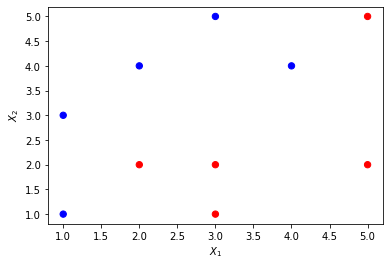

In [2]:
x1 = np.array([1, 1, 2, 2, 3, 3, 3, 4, 5, 5])
x2 = np.array([1, 3, 2, 4, 1, 2, 5, 4,   2, 5])
y = np.array([ 1, 1,-1, 1,-1, -1, 1, 1,  -1,-1])


X = np.vstack((x1,x2)).T
df = pd.DataFrame({'x1':x1, 'x2':x2, 'y':y})

ax = plt.gca()
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
scatter_weights = np.ones(len(y))
ax.scatter(X[:,0],X[:,1], c = y, cmap = cm_bright, s = scatter_weights* 40)

ax.set_xlabel('$X_1$')
ax.set_ylabel('$X_2$')

ax
#plt.savefig('ada_scatter.png')

# Effect of Number of Rounds

### Too Small Number of Rounds:  
- Bad Training Accruracy. 
- Fast Running Time

### Too Large Number of Rounds:  
- Good Training Accruracy (so may overfit). 
- Slow Running Time



Accuracy =  1.0



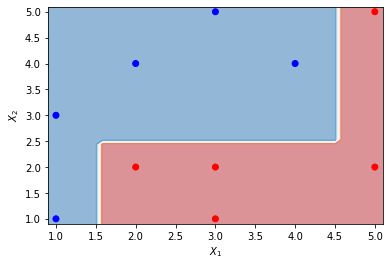

In [3]:
round = 30
L = 1

estimator_list, estimator_weight_list, sample_weight_list  = AdaBoost_scratch(X,y, M=round, depth = 1, 
                                                                              learning_rate = L)

plot_AdaBoost_scratch_boundary(estimator_list, estimator_weight_list, X, y, N = 50 )

# Effect of Learning Rate

Learning Rate determines how fast the model learns.  It should be from 0 to 1.

### Too Small Learning Rate means
  
- Require more rounds to learn the data. 

### Too Large Learning Rate means

- May miss the convergent point for the model -> Low Accuracy! 
- If lucky, it may get to the convergent point faster. 


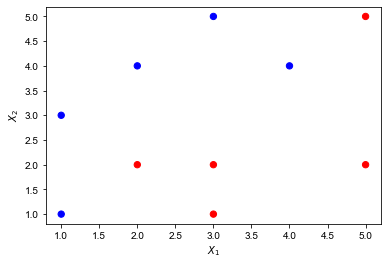

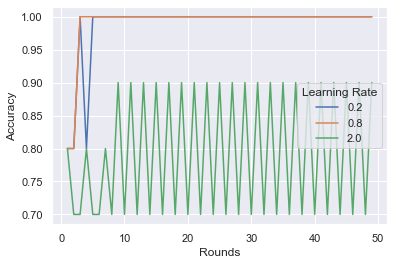

In [4]:
x1 = np.array([1, 1, 2, 2, 3, 3, 3, 4, 5, 5])
x2 = np.array([1, 3, 2, 4, 1, 2, 5, 4,   2, 5])
y = np.array([ 1, 1,-1, 1,-1, -1, 1, 1,  -1,-1])

X = np.vstack((x1,x2)).T
df = pd.DataFrame({'x1':x1, 'x2':x2, 'y':y})

ax = plt.gca()
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
scatter_weights = np.ones(len(y))
ax.scatter(X[:,0],X[:,1], c = y, cmap = cm_bright, s = scatter_weights* 40)

ax.set_xlabel('$X_1$')
ax.set_ylabel('$X_2$')

ax

plt.figure()

ac = pd.DataFrame([], columns=list(['Rounds','Learning Rate','Accuracy']))
for rs in range(1, 50):
    for lr in [.2,.8, 2]:
        boost = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth = 1, max_leaf_nodes=2), 
                            algorithm = 'SAMME',n_estimators=rs, learning_rate=lr)
        boost.fit(X,y)
        ac = ac.append(pd.DataFrame([[rs, lr, boost.score(X,y) ]], 
                                    columns=list(['Rounds','Learning Rate','Accuracy'])), ignore_index=True)

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
ax = sns.lineplot(x="Rounds", y="Accuracy", hue =ac['Learning Rate'].astype('category'),data=ac)

In [5]:
fig = ax.get_figure()
fig.savefig('learning_rate_vs_accuracy.png')

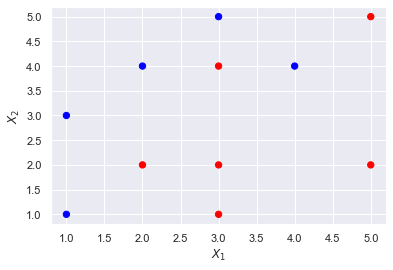

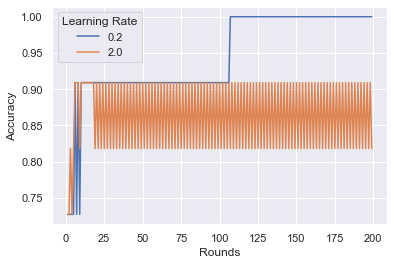

In [6]:
x1 = np.array([1, 1, 2, 2, 3, 3, 3, 4, 5, 5, 3])
x2 = np.array([1, 3, 2, 4, 1, 2, 5, 4,   2, 5, 4])
y = np.array([ 1, 1,-1, 1,-1, -1, 1, 1,  -1,-1, -1])

X = np.vstack((x1,x2)).T
df = pd.DataFrame({'x1':x1, 'x2':x2, 'y':y})

ax = plt.gca()
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
scatter_weights = np.ones(len(y))
ax.scatter(X[:,0],X[:,1], c = y, cmap = cm_bright, s = scatter_weights* 40)

ax.set_xlabel('$X_1$')
ax.set_ylabel('$X_2$')

ax

plt.figure()

ac = pd.DataFrame([], columns=list(['Rounds','Learning Rate','Accuracy']))
for rs in range(1, 200):
    for lr in [.2, 2]:
        boost = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth = 1, max_leaf_nodes=2), 
                            algorithm = 'SAMME',n_estimators=rs, learning_rate=lr)
        boost.fit(X,y)
        ac = ac.append(pd.DataFrame([[rs, lr, boost.score(X,y) ]], 
                                    columns=list(['Rounds','Learning Rate','Accuracy'])), ignore_index=True)

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
ax = sns.lineplot(x="Rounds", y="Accuracy", hue =ac['Learning Rate'].astype('category'),data=ac)

# Tricky Data to Learn

<Figure size 432x288 with 0 Axes>

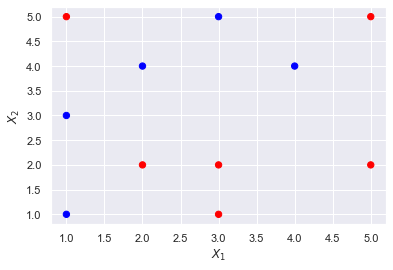

<Figure size 432x288 with 0 Axes>

In [7]:
x1 = np.array([1, 1, 2, 2, 3, 3, 3, 4, 5, 5, 1])
x2 = np.array([1, 3, 2, 4, 1, 2, 5, 4,   2, 5, 5])
y = np.array([ 1, 1,-1, 1,-1, -1, 1, 1,  -1,-1, -1])


X = np.vstack((x1,x2)).T
df = pd.DataFrame({'x1':x1, 'x2':x2, 'y':y})

ax = plt.gca()
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
scatter_weights = np.ones(len(y))
ax.scatter(X[:,0],X[:,1], c = y, cmap = cm_bright, s = scatter_weights* 40)

ax.set_xlabel('$X_1$')
ax.set_ylabel('$X_2$')

ax

plt.figure()


Accuracy =  0.8181818181818182



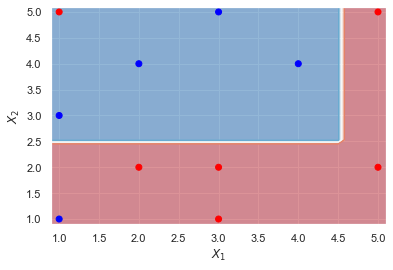

In [8]:
round = 100
L = 1

estimator_list, estimator_weight_list, sample_weight_list  = AdaBoost_scratch(X,y, M=round, depth = 1, 
                                                                              learning_rate = L)

plot_AdaBoost_scratch_boundary(estimator_list, estimator_weight_list, X, y, N = 50 )

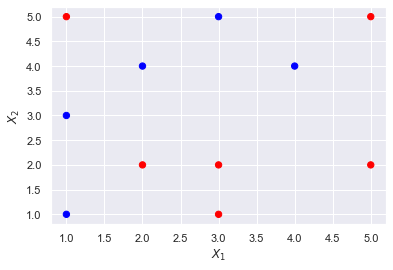

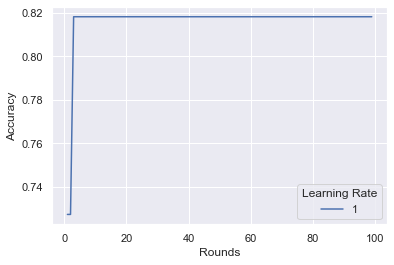

In [9]:
x1 = np.array([1, 1, 2, 2, 3, 3, 3, 4, 5, 5, 1])
x2 = np.array([1, 3, 2, 4, 1, 2, 5, 4,   2, 5, 5])
y = np.array([ 1, 1,-1, 1,-1, -1, 1, 1,  -1,-1, -1])


X = np.vstack((x1,x2)).T
df = pd.DataFrame({'x1':x1, 'x2':x2, 'y':y})

ax = plt.gca()
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
scatter_weights = np.ones(len(y))
ax.scatter(X[:,0],X[:,1], c = y, cmap = cm_bright, s = scatter_weights* 40)

ax.set_xlabel('$X_1$')
ax.set_ylabel('$X_2$')

ax

plt.figure()

ac = pd.DataFrame([], columns=list(['Rounds','Learning Rate','Accuracy']))
for rs in range(1, 100):
    for lr in [1]:
        boost = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth = 1, max_leaf_nodes=2), 
                            algorithm = 'SAMME',n_estimators=rs, learning_rate=lr)
        boost.fit(X,y)
        ac = ac.append(pd.DataFrame([[rs, lr, boost.score(X,y) ]], 
                                    columns=list(['Rounds','Learning Rate','Accuracy'])), ignore_index=True)

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
ax = sns.lineplot(x="Rounds", y="Accuracy", hue =ac['Learning Rate'].astype('category'),data=ac)

# Titanic Data

### Data Preparation

In [10]:
import pandas as pd
import numpy as np
np.random.seed(12356)
df = pd.read_csv('titanic.csv')
# Assign input variables
X = df.loc[:,['Pclass','Sex','Age','Fare','Embarked','SibSp','Parch']]

# Assign target variable
y = df['Survived']

# Replace missing values by the median
X["Age"] = X["Age"].fillna(X["Age"].median())

# Impute the Embarked variable
X["Embarked"] = X["Embarked"].fillna("S")
# Change Pclass to categorical variable
X['Pclass'] = X['Pclass'].astype(object)

# Encode categorical variable
X = pd.get_dummies(X)

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

### Train and Test an Adaboost

In [11]:
from sklearn.ensemble import AdaBoostClassifier
r1 = AdaBoostClassifier(n_estimators=100, learning_rate=1)
r1.fit(x_train, y_train)
# Accuracry on test data
r1.score(x_test, y_test)

0.835820895522388

### Learning Rate vs. n_estimators

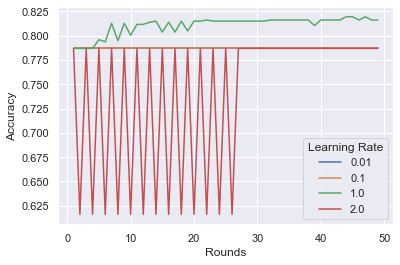

In [12]:
ac = pd.DataFrame([], columns=list(['Rounds','Learning Rate','Accuracy']))
for rs in range(1, 50):
    for lr in [.01, .1,  1, 2]:
        boost = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth = 1, max_leaf_nodes=2), 
                            algorithm = 'SAMME',n_estimators=rs, learning_rate=lr)
        boost.fit(X,y)
        ac = ac.append(pd.DataFrame([[rs, lr, boost.score(X,y) ]], 
                                    columns=list(['Rounds','Learning Rate','Accuracy'])), ignore_index=True)

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
ax = sns.lineplot(x="Rounds", y="Accuracy", hue =ac['Learning Rate'].astype('category'),data=ac)